# Programming Assignment

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 367, 'name': 'Dota2 Games Results', 'repository_url': 'https://archive.ics.uci.edu/dataset/367/dota2+games+results', 'data_url': 'https://archive.ics.uci.edu/static/public/367/data.csv', 'abstract': 'Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and weaknesses.', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 102944, 'num_features': 115, 'feature_types': [], 'demographics': [], 'target_col': ['win'], 'index_col': ['clusterid'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Apr 13 2024', 'dataset_doi': '10.24432/C5W593', 'creators': ['Stephen Tridgell'], 'intro_paper': None, 'additional_info': {'summary': 'Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and wea

**CORRELATION HEAT MAP**

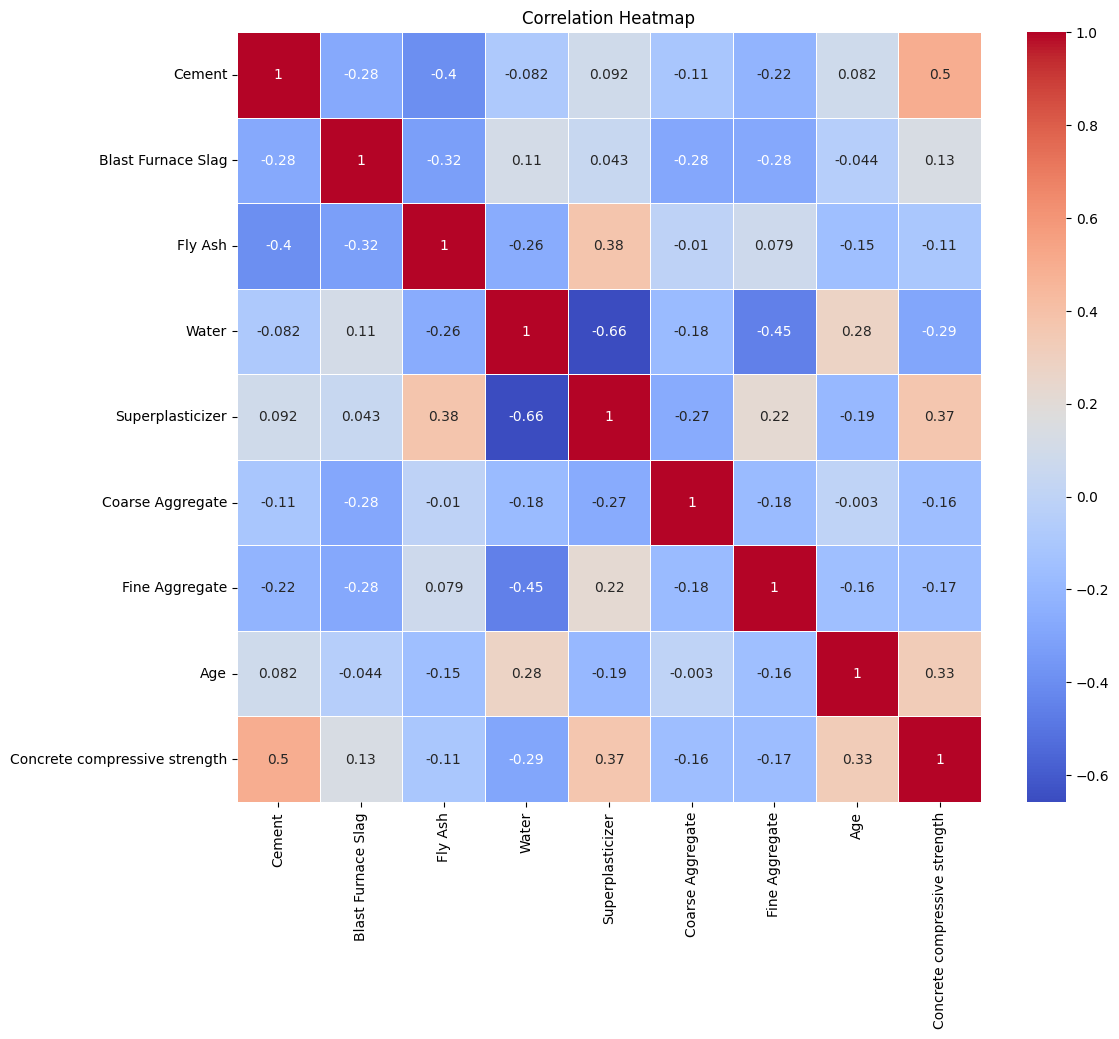

Top 5 features correlated with Concrete compressive strength:
Index(['Cement', 'Superplasticizer', 'Age', 'Water', 'Fine Aggregate'], dtype='object')


In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# Extract features and targets
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Identify the top 5 correlated features with the target
target_column = y.columns[0]  # Assuming the target column is the first in the y DataFrame
correlations = correlation_matrix[target_column].abs().sort_values(ascending=False)
top_5_features = correlations.index[1:6]  # Skip the first one as it is the target itself

print(f"Top 5 features correlated with {target_column}:")
print(top_5_features)


## Train | Test Split

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

In [2]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print(f"Training feature set shape: {X_train.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Test feature set shape: {X_test.shape}")
print(f"Test target set shape: {y_test.shape}")


Training feature set shape: (927, 8)
Training target set shape: (927, 1)
Test feature set shape: (103, 8)
Test target set shape: (103, 1)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor  # Assuming regression since it's a compressive strength dataset

# Create a pipeline with a StandardScaler and KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Print the pipeline steps
print(pipeline)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)
print(f"Model Score: {score}")


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])
Model Score: 0.7324337717055658


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [4]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to test different values of k
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Score: {test_score}")


Best parameters: {'knn__n_neighbors': 3}
Best score: -80.70959344331428
Test Score: 0.7178141604343669


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

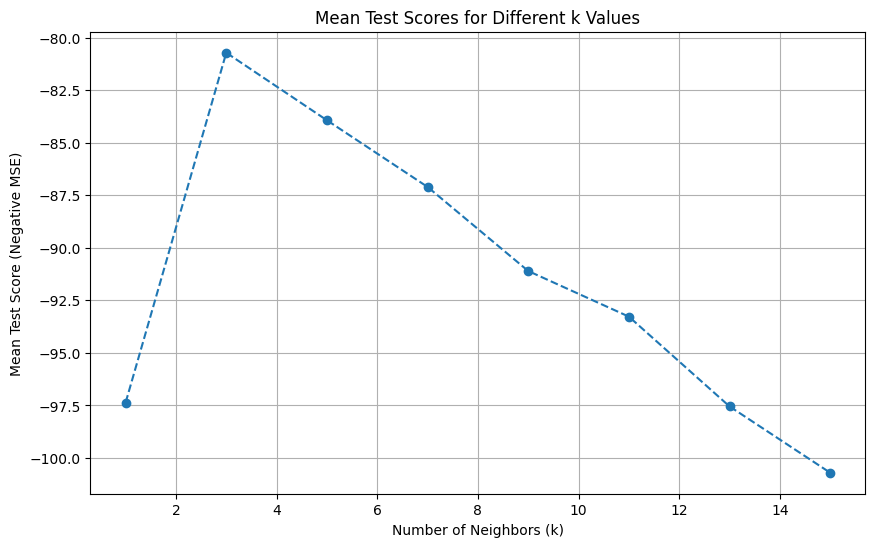

In [5]:
import matplotlib.pyplot as plt

# Extract the mean test scores and corresponding k values from the grid search results
mean_test_scores = grid_search.cv_results_['mean_test_score']
param_k_values = grid_search.cv_results_['param_knn__n_neighbors']

# Plot the mean test scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(param_k_values, mean_test_scores, marker='o', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Mean Test Scores for Different k Values')
plt.grid(True)
plt.show()


## Final Model Evaluation


**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

Best parameters: {'knn__n_neighbors': 3}
Best score: -80.70959344331428


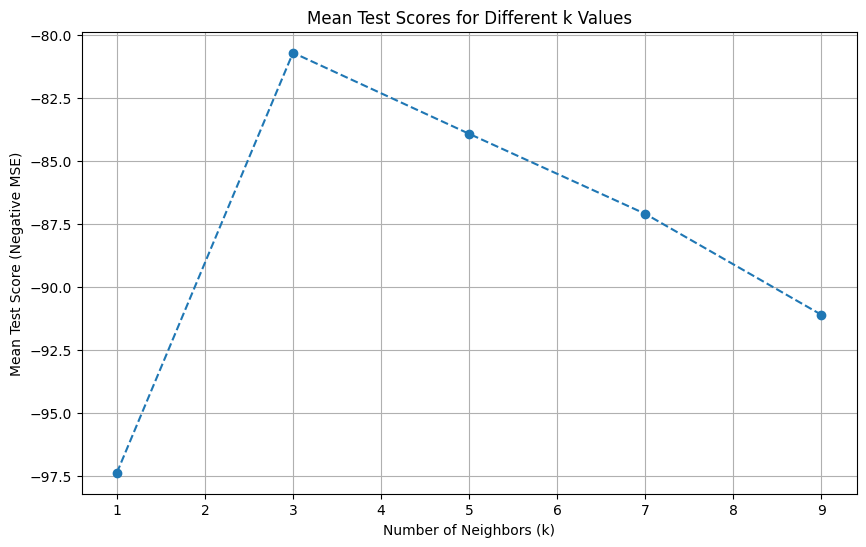

Regression Performance Metrics:
Mean Squared Error (MSE): 75.0411349514563
R² Score: 0.7178141604343669


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# Define features and targets
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# Split the data into training and test sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create a pipeline with a StandardScaler and KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Define the parameter grid to test different values of k
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9]
}

# Create a grid search with cross-validation, using multiple CPU cores
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Plot the mean test scores for each k value
mean_test_scores = grid_search.cv_results_['mean_test_score']
param_k_values = grid_search.cv_results_['param_knn__n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(param_k_values, mean_test_scores, marker='o', linestyle='--')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Mean Test Scores for Different k Values')
plt.grid(True)
plt.show()

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print regression performance metrics
print("Regression Performance Metrics:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")
